In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.cm
import matplotlib.patches as mpatches
import seaborn as sns

import scanpy as sc


Part 1:
In this part, we will subset cells based their weights in topic2-4 and their participation in the ILC2-ILC3 transition
We will pick a trail of points alon the ILC2-ILC3 transition based on pseudotime calculation

In [2]:
ILC_var = sc.read("sct_variable.h5ad")
#ILC = sc.read("sct.h5ad")

C:\Users\User\Anaconda3\lib\site-packages\anndata\compat\__init__.py:182: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
C:\Users\User\Anaconda3\lib\site-packages\anndata\compat\__init__.py:182: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


In [66]:
print(ILC_var)

AnnData object with n_obs × n_vars = 26877 × 3000
    obs: 'ClusterID', 'ClusterName', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'orig_ident', 'pct_mt', 'percent_mt', 'timept', 'day', 'lda_1', 'lda_2', 'lda_3', 'lda_4', 'lda_5', 'lda_6', 'lda_7', 'lda_8', 'lda_9', 'lda_10', 'lda_11', 'lda_12', 'lda_13', 'lda_14', 'lda_15', 'lda_16', 'lda_17', 'ilc3_precursors_ot', 'ilc3_endpoints', 'quiescent_endpt_day0', 'quiescent_endpt_day4', 'ilc2_endpt_day0', 'ilc2_endpt_day4', 'cloud_entpt', 'dpt_pseudotime', 'quiescent_ilc3', 'cloud_ilc3', 'ilc2_quiescent', 'ilc2_ilc3'
    var: 'Selected', 'sct_detection_rate', 'sct_gmean', 'sct_residual_mean', 'sct_residual_variance', 'sct_variable', 'sct_variance'
    uns: 'diffmap_evals', 'draw_graph', 'iroot', 'neighbors', 'pca'
    obsm: 'X_diffmap', 'X_draw_graph_fa', 'X_pca', 'pca_cell_embeddings', 'umap_cell_embeddings'
    varm: 'PCs', 'pca_feature_loadings'
    layers: 'count_data', 'norm_data', 'scale_data'
    obsp: 'distances', 'co

In [66]:
print(ILC_var.obsp['distances'].shape)

(26877, 26877)


In [3]:
#2D force directed layout coordinates
fdl = ILC_var.obsm['X_draw_graph_fa']
umap_x = ILC_var.obsm['umap_cell_embeddings']

To analyze the ilc2-ilc3 transition, we select cells from topics 2-4 above a threshold. This was informed by inspecting the force-directed layout. 

In [5]:
from numpy import isnan
def indices_not_NaNs(data):
    '''
    return the indices of entries that are not NaNs
    '''
    indices = []
    for i in range(len(data)):
        if isnan(data[i]):
            continue;
        else:
            indices.append(i)
    return np.array(indices)

def thresholding(data, th):
    '''
    data: an array, or a pandas series object etc
    th: threshold
    Return the indices as a numpy array of all elements above th in data
    '''
    indices = []
    for i in range(len(data)):
        if data[i] > th:
            indices.append(i)
    return np.array(indices)

def interval_indices(data, lb, ub):
    indices = []
    for i in range(len(data)):
        di = data[i]
        if di >= lb and di <= ub:
            indices.append(i)
    return np.array(indices)

In [6]:
#threshold for topics
t2_th = 0.2
t3_th = 0.2
t4_th = 0.2
#subset cells from topics 2-4
indices_t2th = thresholding(ILC_var.obs['lda_2'], t2_th)
weights_t2th = ILC_var.obs['lda_2'][indices_t2th]
                                    
indices_t3th = thresholding(ILC_var.obs['lda_3'], t3_th)
weights_t3th = ILC_var.obs['lda_3'][indices_t3th]
                                    
indices_t4th = thresholding(ILC_var.obs['lda_4'], t4_th)
weights_t4th = ILC_var.obs['lda_4'][indices_t4th]

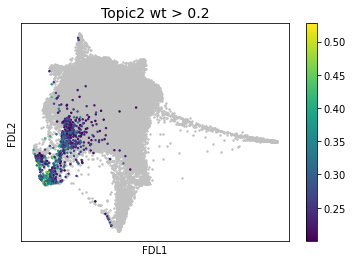

In [8]:
#verify topic 2 selection
t2plot = plt.scatter(fdl[:,0], fdl[:,1], s=2, c = "silver")
t2plot = plt.scatter(fdl[indices_t2th,0], fdl[indices_t2th,1], s=2, c = weights_t2th)
t2plot.axes.get_xaxis().set_ticks([])
t2plot.axes.get_yaxis().set_ticks([])
plt.colorbar(t2plot)
plt.ylabel('FDL2')
plt.xlabel('FDL1')
plt.title('Topic2 wt > 0.2', fontsize=14)
plt.show()

In [111]:
#subset the cells from the dpt of ILC2-ILC3 transitions
ILC2_ILC3_transition_indices = indices_not_NaNs(ILC_var.obs['ilc2_ilc3'])
ILC2_ILC3_transition_pt = ILC_var.obs['ilc2_ilc3'][ILC2_ILC3_transition_indices]
#pick the cheerios trail
#choose some timepoints for selection
time_points = np.array([0., 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45,
                        0.5, 0.55, 0.6, 0.7, 0.75, 0.8, 0.9, 0.95, 1])
track = 0
#pick the points for the cheerio Trial
trail_indices = []
np.random.seed(4321)
for i in range(len(time_points)):
    if i < len(time_points)-1:
        trail_indices.append(ILC2_ILC3_transition_indices[np.random.choice(interval_indices(ILC2_ILC3_transition_pt, time_points[i], time_points[i+1]))])
trail_indices = np.array(trail_indices)
print(trail_indices)
print(ILC_var.obs['ilc2_ilc3'][trail_indices])
np.save('trail_indices', trail_indices)

[11224 10650 13839  6262 18822 16398  5015 18641 21230  5186 14758 18581
 17999  5696 17564 17710 22039]
index
Timept1.TTGTTCAGTGACGCCT    0.086774
Timept1.TGCGGGTCACATCATG    0.102924
Timept2.GGGACTCTCCGGCAGT    0.150556
Timept1.AGGTCATCACACGGTC    0.243732
Timept3.GAGTGAGTCTACGGGC    0.253083
Timept3.AGGGTGAGTGGCCTCA    0.329229
Timept0.TTCCACGGTGGACAGT    0.374352
Timept3.GACCAATTCAATGCAC    0.412661
Timept3.TGCTCGTTCAAAGCCT    0.476698
Timept0.TTGTGGATCATTCGGA    0.530118
Timept2.TCTAACTGTAGAGTTA    0.557201
Timept3.GAAGGACGTCTATGAC    0.689342
Timept3.CGTCAAACACTACACA    0.718699
Timept1.ACATCCCAGGTCGAGT    0.763507
Timept3.CCCGGAAGTATGGTAA    0.867781
Timept3.CCTCACAAGTAACGTA    0.937711
Timept4.AACGTCAAGCCAGTAG    1.000000
Name: ilc2_ilc3, dtype: float64


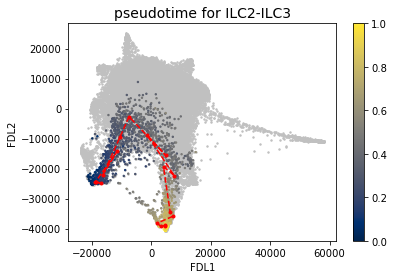

In [15]:
#visualize the ilc2_ilc3_transition pseudotimes
ilc2_ilc3_Transition = plt.scatter(fdl[:,0], fdl[:,1], s=2, c = "silver")
ilc2_ilc3_Transition = plt.scatter(fdl[ILC2_ILC3_transition_indices,0], 
                                   fdl[ILC2_ILC3_transition_indices,1], 
                                   s=2, c = ILC2_ILC3_transition_pt, cmap='cividis')
plt.colorbar(ilc2_ilc3_Transition )
#visualize the trail
ilc2_ilc3_Transition = plt.plot(fdl[trail_indices,0], fdl[trail_indices,1], '.r--')
plt.ylabel('FDL2')
plt.xlabel('FDL1')
plt.title('pseudotime for ILC2-ILC3', fontsize=14)
plt.savefig('trail.jpg', format='jpg', dpi=400)
plt.show()

In [110]:
#combine cells from topics and ilc2-ilc3 transitions to be the cells of interest for local study
imp_indices = np.unique(np.concatenate((indices_t2th, indices_t3th, indices_t4th, ILC2_ILC3_transition_indices)))
np.save('imp_indices', imp_indices)

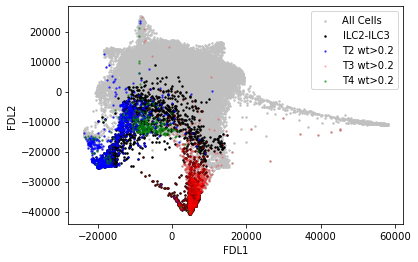

In [52]:
#make a plot showing where imp cells are 
impplot = plt.scatter(fdl[:,0], fdl[:,1], s=2, c = "silver")
impplot = plt.scatter(fdl[ILC2_ILC3_transition_indices,0], fdl[ILC2_ILC3_transition_indices,1], s=2, c = 'black')
impplot = plt.scatter(fdl[indices_t2th,0], fdl[indices_t2th,1], s=2, c = 'blue', alpha=0.6)
impplot = plt.scatter(fdl[indices_t3th,0], fdl[indices_t3th,1], s=2, c = 'red', alpha=0.2)
impplot = plt.scatter(fdl[indices_t4th,0], fdl[indices_t4th,1], s=2, c = 'green', alpha=0.5)
plt.ylabel('FDL2')
plt.xlabel('FDL1')
plt.legend(['All Cells', 'ILC2-ILC3', 'T2 wt>0.2', 'T3 wt>0.2', 'T4 wt>0.2'])
plt.savefig('impCells.jpg', format='jpg', dpi=400)

In [17]:
from sklearn.metrics.pairwise import euclidean_distances
import scipy

In [ ]:
#compute Eucliedean distance in the normalized variable gene space
dist_mat = euclidean_distances(ILC_var.layers['norm_data'][imp_indices])
np.save('imp_cell_dist_mat', dist_mat)

In [128]:
#load the distacne matrix for important cells. 
dist_mat = np.load('imp_cell_dist_mat.npy')
imp_cells = ILC_var.layers['norm_data'][imp_indices]
#imp_cells = scipy.sparse.csr_matrix.toarray(ILC_var.layers['norm_data'][imp_indices])


Make trail plot 

In [31]:
#cid_subset = np.where(imp_indices==trail_indices[0])[0][0]
#cid_whole = trail_indices[0]
def trailcidplotFDL(cid, i):
    ilc2_ilc3_Transition = plt.scatter(fdl[:,0], fdl[:,1], s=2, c = "silver", zorder=1)
    ilc2_ilc3_Transition = plt.scatter(fdl[imp_indices,0], fdl[imp_indices,1], s=2, c='yellow',alpha=0.5, zorder=2)
    #visualize the trail
    ilc2_ilc3_Transition = plt.plot(fdl[trail_indices,0], fdl[trail_indices,1], '.r--', zorder=4)
    ilc2_ilc3_Transition = plt.scatter(fdl[cid,0], fdl[cid,1], s=10, c = "green", marker="D", zorder=5)

    #show highdimensional ball around centerpoint
    cid_subset = np.where(imp_indices==trail_indices[i])[0][0]
    dist_to_cid = dist_mat[cid_subset,:]
    closest500indices = np.argsort(dist_to_cid)[1:501]
    closest500distances = dist_to_cid[closest500indices]
    closest500cells = imp_indices[closest500indices]
    ilc2_ilc3_Transition = plt.scatter(fdl[closest500cells,0], fdl[closest500cells,1], s=2,  c = closest500distances, cmap='cool_r', zorder=3)
    plt.colorbar(ilc2_ilc3_Transition)

    plt.ylabel('FDL2')
    plt.xlabel('FDL1')
    plt.legend(['Trail','All Cells', 'ImpCells', 'Center', 'Cells Close to Center'])
    title = 'FDL TrailPlot trailStop=' + str(i)
    plt.title(title)
    st = 'FDLtrailStop='+str(i)+'_cid=' + str(cid) +'.jpg'
    plt.savefig(st, format='jpg', dpi=400)
    plt.show()
    
def trailcidplotUMAP(cid, i):
    ilc2_ilc3_Transition = plt.scatter(umap_x[:,0], umap_x[:,1], s=2, c = "silver", zorder=1)
    ilc2_ilc3_Transition = plt.scatter(umap_x[imp_indices,0], umap_x[imp_indices,1], s=2, c='yellow', alpha=0.5, zorder=2)
    
    #visualize the trail
    ilc2_ilc3_Transition = plt.plot(umap_x[trail_indices,0], umap_x[trail_indices,1], '.r--', zorder=4)
    ilc2_ilc3_Transition = plt.scatter(umap_x[cid,0], umap_x[cid,1], s=10, c = "green", marker="D", zorder=5)
    
    #show highdimensional ball around centerpoint
    cid_subset = np.where(imp_indices==trail_indices[i])[0][0]
    dist_to_cid = dist_mat[cid_subset,:]
    closest500indices = np.argsort(dist_to_cid)[1:501]
    closest500distances = dist_to_cid[closest500indices]
    closest500cells = imp_indices[closest500indices]
    ilc2_ilc3_Transition = plt.scatter(umap_x[closest500cells,0], umap_x[closest500cells,1], s=2,  c = closest500distances, cmap='cool_r', zorder=3)
    plt.colorbar(ilc2_ilc3_Transition)

    plt.ylabel('UMAP2')
    plt.xlabel('UMAP1')
    plt.legend(['Trail','All Cells', 'ImpCells', 'Center', 'Close Cells'])
    title = 'UMAP TrailPlot trailStop=' + str(i)
    plt.title(title)
    st = 'UMAPtrailStop='+str(i)+'_cid=' + str(cid) +'.jpg'
    plt.savefig(st, format='jpg', dpi=400)
    plt.show()

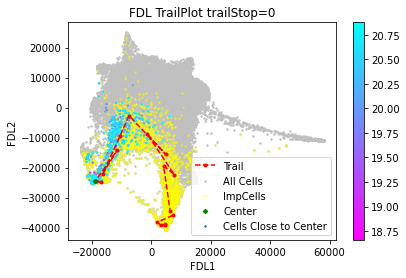

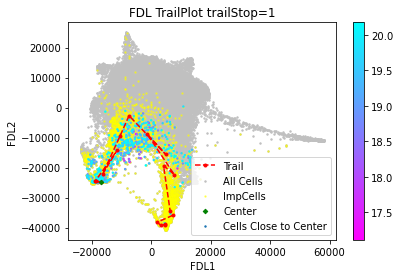

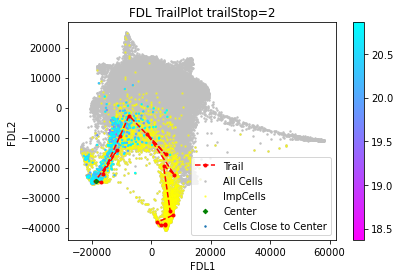

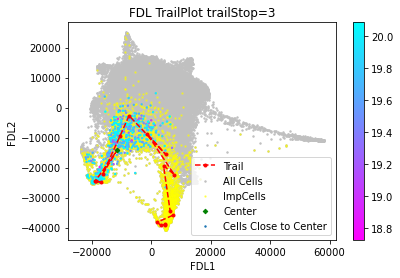

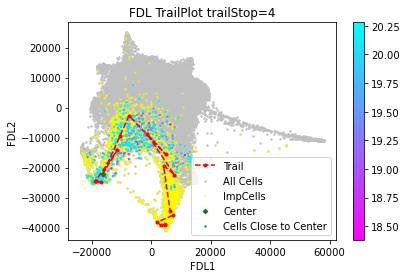

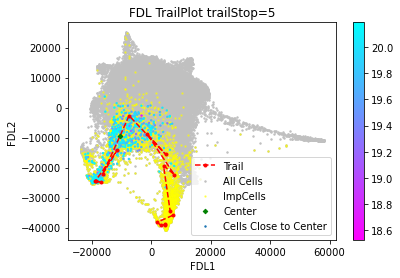

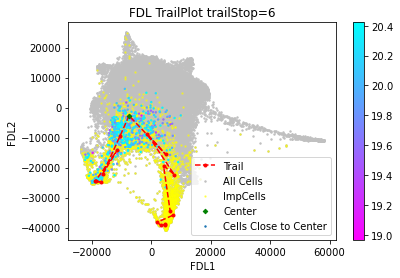

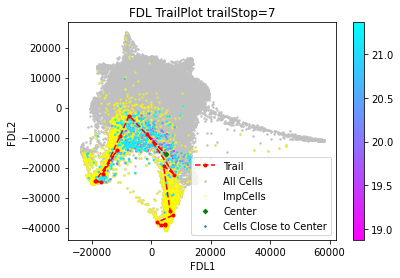

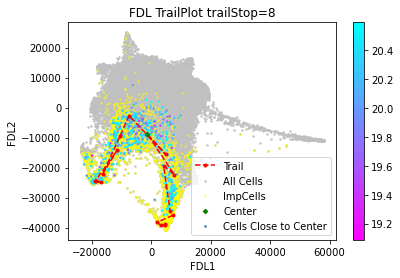

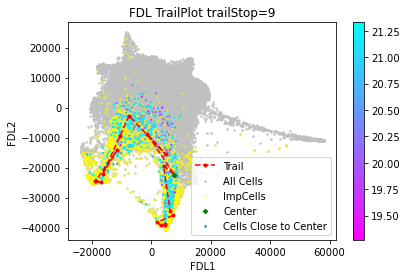

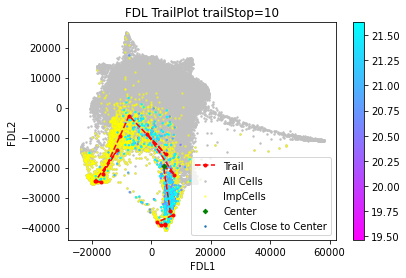

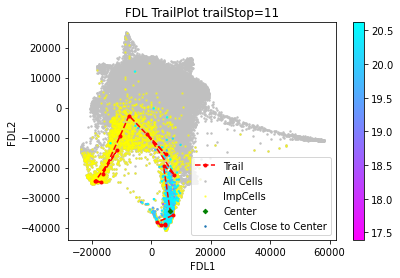

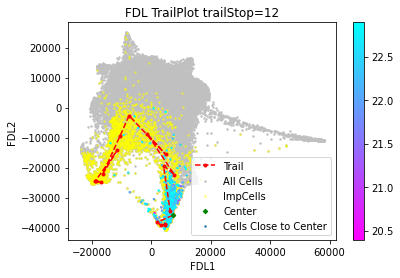

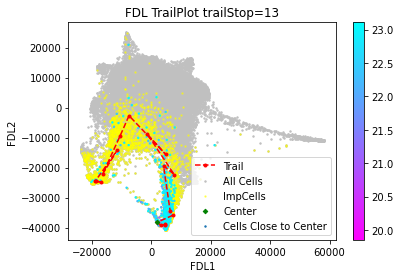

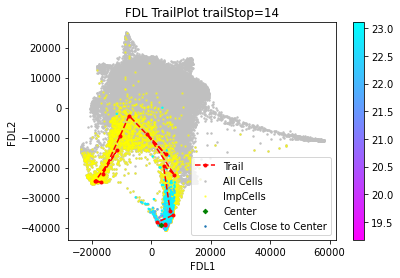

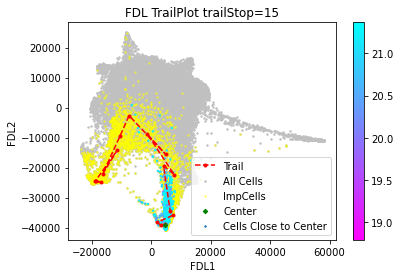

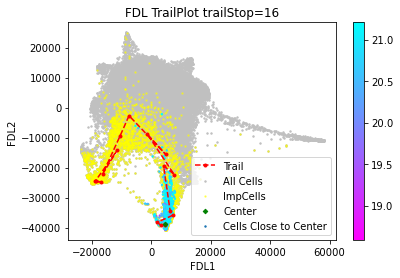

In [32]:
#trailplot
for i in range(len(trail_indices)):
    cid_whole = trail_indices[i]
    trailcidplotFDL(cid_whole, i)

Part 2:
We compute eigenplot centering around points along the cheerio trails. 
The hyperspheres include only the important cells we have chosen from topic2-4

In [36]:
from manifold_utils.mSVD import two_index_iterator, eigen_calc_from_dist_mat_withNumPoints, Sparse_eigen_calc_from_dist_mat
from scipy.sparse.linalg import svds

In [129]:
'''
Bugged
'''
def Sparse_eigen_calc_from_dist_mat(cloud, dist_mat, center_ind, Rstart, Rend, radint=.01, k=10):
    """
    This function iterates through specidic radii values and performs PCA at the given radius. The PCA values (eigenvalues, eigenvectors) are then saved and returned in a multidimensional list.
    Also, this function requires the numpy, random, and scipy packages for proper use.

    Parameters:
        cloud (arr): a multidimensional point cloud array that contains the coordinates of the points in the cloud
        center_ind (int): the index of the desired point on which the sphere is centered
        # radstart (int): the first radius value of the expanding sphere
        # radend (int): the final value (included) of the expanding spherical radius
        radint (float): Default = .01; the interval (step size) at which the radius expands
    """
    N, d = cloud.shape # Get number N of points and dimension d of ambient space
    assert dist_mat.shape == (N, N) # Assert agreement between cloud.shape and dist_mat.shape

    dist_vec = dist_mat[center_ind, :]
    sorted_vec = np.sort(dist_vec)
    radii = [*np.arange(sorted_vec[5], sorted_vec[-1] + radint, radint)]
    indices = list(range(N))
    indices.sort(key=lambda x: dist_vec[x])
    radius_list = []
    eigval_list = []
    eigvec_list = []
    numPoints_list = [] #track the number of points 
    for rad, cands in two_index_iterator(radii, indices, key=lambda x: dist_vec[x]):
        if len(cands) > 0:
            new_cands = np.stack([cloud[cand, :] for cand in cands], axis=0)
            try:
                points = np.vstack([points, new_cands])
            except NameError:
                points = new_cands
            if rad < Rstart:
                continue;
            elif rad > Rend:
                break;
            else:
                #get sample size
                n = points.shape[0]
                #center the data
                sPoints = scipy.sparse.csr_matrix(points)
                cPoints = sPoints - sPoints.mean(axis=0)
                #svd for the top k
                u, s, vt = svds(cPoints, k)
                eigvals = np.square(s)/(n-1)
                radius_list.append(rad)
                eigval_list.append(np.square(s)/(n-1))
                eigvec_list.append(vt)
                numPoints_list.append(n)
        else:
            if rad < Rstart:
                continue;
            elif rad > Rend:
                break;
            else:
                eigval_list.append(eigval_list[-1])
                eigvec_list.append(eigvec_list[-1])
                numPoints_list.append(numPoints_list[-1])
                radius_list.append(rad)
    return radius_list, numPoints_list, eigval_list, eigvec_list

def eigen_plot_numPoints(eigval_list, xaxis, xtype, ts):
    """
    This function plots the multidimensional eigenvalue list created from the eigen_calc function. X-axis corresponds to the radii value, while the y-axis corresponds to the eigenvalues. Each individual line represents a dimension.
    Also, this function requires both the matplotlib and numpy packages.
    Run the code: %matplotlib inline, when in jupyter notebook to display the plot in the notebook.

    Parameters:
        eigval_list (list): This is a multidimensional list containing eigenvalues at different radii values
        x_axis. Either radii or number of points included
    """

    # Plot the eigenvalues
    #radii = np.arange(radstart, radend + radint, radint)  # creates an array of radii values to iterate through
    eig_mat = np.stack(eigval_list, axis=0)  # stacks eigenvalue list into an array (dimensions of N x D)
    dim_eig_mat = np.shape(eig_mat)  # saves dimensions of the eienvalue matrix for easy access
    fig = plt.figure()  # creates a figure plot
    axes = fig.add_subplot(111)  # adds x and y axes to the plot
    for i in range(dim_eig_mat[1]):  # iterates through the columns (dimensions) of the eigenvalue matrix
        axes.plot(xaxis, eig_mat[:, i])  # plots eigenvalues (y-axis) against each radii value (x-axis)
    st = xtype + 'trailStop=' + str(ts) + ".jpg"
    plt.xlabel(xtype, fontsize=14)
    plt.ylabel('Eigenvalues')
    title = 'Eigenplot trailStop=' + str(ts)
    plt.title(title)
    plt.savefig(st, dpi=400)
    return (plt.show())

In [ ]:
#compute eigvectors for all points in the trail
Rstart = 19
Rend = 24
for i in range(len(trail_indices)):
    cid_subset = np.where(imp_indices==trail_indices[i])[0][0]
    radii, numPoints_list, eigval_list, eigvec_list = eigen_calc_from_dist_mat_withNumPoints(imp_cells, 
                                                    dist_mat, cid_subset, Rstart, Rend, radint=0.2)
    eigvec_list = np.array(eigvec_list)
    #the eigenvectors has been sorted by increasing eigenvalues.
    #Take the top eigenvectors
    #top_eigvec =  eigvec_list[:, :, -20:]
    #fn = 'eigenvec_trailStop='+str(i)
    #np.save(fn, top_eigvec)
    
    eigen_plot_numPoints(eigval_list, numPoints_list, 'Num Points', i)
    eigen_plot_numPoints(eigval_list, radii, 'radii', i)

In [126]:
Rstart = 19
Rend = 24
cid_subset = np.where(imp_indices==trail_indices[0])[0][0]
radii, numPoints_list, eigval_list, eigvec_list = eigen_calc_from_dist_mat_withNumPoints(imp_cells, 
                                                    dist_mat, cid_subset, Rstart, Rend, radint=0.2)
eigvec_list = np.array(eigvec_list)
eigval_list = np.array(eigval_list)
eigen_plot_numPoints(eigval_list[:, -10:], numPoints_list, 'Num Points', 0)
eigen_plot_numPoints(eigval_list, radii[:, -10:], 'radii', 0)

ValueError: k must be between 1 and min(A.shape), k=10

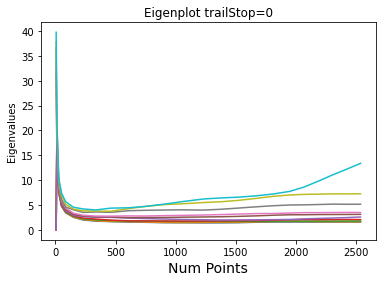

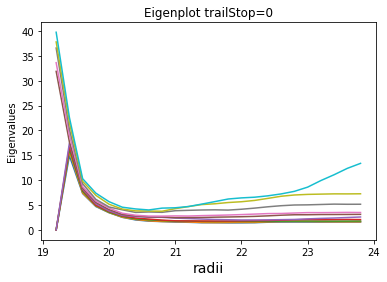

In [130]:
Rstart = 20
Rend = 25
cid_subset = np.where(imp_indices==trail_indices[0])[0][0]
radii, numPoints_list, eigval_list, eigvec_list = Sparse_eigen_calc_from_dist_mat(imp_cells, 
                                                    dist_mat, cid_subset, Rstart, Rend, radint=0.2)
eigvec_list = np.array(eigvec_list)
eigen_plot_numPoints(eigval_list, numPoints_list, 'Num Points', 0)
eigen_plot_numPoints(eigval_list, radii, 'radii', 0)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 6 and the array at index 1 has size 5